
# **Title**: Machine Learning for Turbulence Modeling and Flow Optimization in Aerospace  
### **Name:** Y.Sai Goutham
### **Roll No.:** 24M0037
### **Dataset Source:** [Johns Hopkins Turbulence Database (JHTDB)](https://turbulence.pha.jhu.edu/)  
### **Source of the code:**Developed partially by me and (https://www.kaggle.com/datasets/ryleymcconkey/ml-turbulence-dataset/data)



## 1. Introduction
Turbulence plays a crucial role in **aerospace engineering** and **fluid mechanics**.  
This project aims to analyze **turbulent flow** using **machine learning** and **Computational Fluid Dynamics (CFD)** simulations.

### **Objectives**
 Retrieve **turbulence velocity data** from JHTDB  
 Perform **Exploratory Data Analysis (EDA)** to assess the dataset  
 Develop a **machine learning model** to predict **turbulence intensity**  
 Use **2D and 3D visualizations** to analyze turbulence effects  
  


##  2. Importing Required Libraries

please install any missing packages if any require

In [ ]:
!pip install pyvista
!apt-get install -y xvfb libgl1-mesa-glx
!pip install givernylocal


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.0 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.14).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.5/355.5 kB 29.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: t

In [ ]:
!pip uninstall -y numpy pandas pyvista seaborn
!pip install --no-cache-dir numpy==1.24.4 pandas==1.5.3 pyvista seaborn


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: pyvista 0.45.0
Uninstalling pyvista-0.45.0:
  Successfully uninstalled pyvista-0.45.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 222.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 220.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pand

In [ ]:
# Standard Libraries
import numpy as np
import pandas as pd
import pyvista as pv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# JHTDB Libraries
from givernylocal.turbulence_dataset import turb_dataset
from givernylocal.turbulence_toolkit import getData

# Jupyter Notebook Display Utility
from IPython.display import display, Image


We are importing data handling libraries (NumPy, Pandas).

Machine learning models include Random Forest and Support Vector Regression (SVR).

givernylocal is used for retrieving turbulence data from JHTDB


##  3. Dataset Selection & Configuration

In [ ]:

# Display Available Turbulence Datasets
SUPPORTED_DATASETS = [
    "isotropic1024coarse", "isotropic1024fine", "isotropic4096", "isotropic8192",
     "sabl2048high", "rotstrat4096", "mhd1024", "mixing",
    "channel", "channel5200", "transition_bl"
]

# User Input: Select Dataset
dataset_title = input(f"Select dataset from {SUPPORTED_DATASETS}: ").strip()
if dataset_title not in SUPPORTED_DATASETS:
    raise ValueError("Invalid dataset selected. Please choose a valid dataset.")

# Authentication Token (Default JHTDB)
auth_token = 'edu.jhu.pha.turbulence.testing-201406'
output_path = './giverny_output'

# Initialize Dataset
dataset = turb_dataset(dataset_title=dataset_title, output_path=output_path, auth_token=auth_token)

# Select Dimension (2D or 3D)
dimension = int(input("Enter dataset dimension (2 for 2D, 3 for 3D): "))

# Store Global Variables
%store dataset
%store dataset_title
%store dimension


Select dataset from ['isotropic1024coarse', 'isotropic1024fine', 'isotropic4096', 'isotropic8192', 'sabl2048high', 'rotstrat4096', 'mhd1024', 'mixing', 'channel', 'channel5200', 'transition_bl']: channel
Enter dataset dimension (2 for 2D, 3 for 3D): 2
Stored 'dataset' (turb_dataset)
Stored 'dataset_title' (str)
Stored 'dimension' (int)


The dataset is chosen from JHTDB datasets.

2D vs. 3D selection allows different turbulence models.

##  4. Grid Setup & Data Querying

In [ ]:
# Load Stored Variables
%store -r dataset
%store -r dataset_title
%store -r dimension

# Define Grid Resolution (Lower values prevent API overload)
if dimension == 3:
    nx, ny, nz = 16, 16, 16
    x_points = np.linspace(0.0, 0.4 * np.pi, nx)
    y_points = np.linspace(-1, 1, ny)
    z_points = np.linspace(0.0, 0.15 * np.pi, nz)
    points = np.array([[x, y, z] for x in x_points for y in y_points for z in z_points])
else:
    nx, ny = 32, 32
    x_points = np.linspace(0.0, 0.4 * np.pi, nx)
    y_points = np.linspace(-1, 1, ny)
    points = np.array([[x, y, 0] for x in x_points for y in y_points])


%store points


Stored 'points' (ndarray)


In [ ]:
# Load Variables
%store -r points
try:
    velocity_raw = getData(dataset, 'velocity', 1.0, 'none', 'lag8', 'field', points)

    # Debug: Check the response type
    print("✅ Raw API Response Type:", type(velocity_raw))

    # Handle different error cases
    if not velocity_raw or len(velocity_raw) == 0:
        raise ValueError("🚨 JHTDB returned an empty dataset. Try changing the query parameters.")

    if isinstance(velocity_raw, dict):
        print("🚨 API Error Response:", velocity_raw)
        raise ValueError("JHTDB API returned an error. Check query parameters.")

    # Convert to NumPy array
    velocity = np.array(velocity_raw, dtype=np.float32)
    velocity = np.squeeze(velocity)

    # Ensure correct shape
    if velocity.shape[0] != points.shape[0]:
        raise ValueError(f"🚨 Dimension Mismatch: Expected {points.shape[0]}, Got {velocity.shape[0]}")

    # Store for future use
    %store velocity
    print(f"✅ Velocity Data Retrieved! Shape: {velocity.shape}")

except Exception as e:
    print(f"⚠️ Error fetching velocity data: {str(e)}")





-----
getData is processing...

total time elapsed = 34.630 seconds (0.577 minutes)

query completed successfully.
-----
✅ Raw API Response Type: <class 'list'>
Stored 'velocity' (ndarray)
✅ Velocity Data Retrieved! Shape: (1024, 3)


A structured grid is created for turbulence evaluation.

Uses JHTDB API to retrieve velocity components (u, v, w).
https://github.com/sciserver/giverny/blob/master/DEMO_Getdata_local.ipynb

## 5. Machine Learning Model: Turbulence Prediction

In [ ]:
# Load Variables
%store -r points
%store -r velocity
%store -r dimension

#  Ensure Velocity Data is Retrieved Properly
if velocity is None or not isinstance(velocity, np.ndarray):
    raise RuntimeError("🚨 No valid velocity data retrieved. Exiting script.")

# Ensure Data Has the Right Shape
if velocity.ndim == 2 and velocity.shape[1] >= 2:
    u, v = velocity[:, 0], velocity[:, 1]
    w = velocity[:, 2] if (dimension == 3 and velocity.shape[1] > 2) else np.zeros_like(u)
else:
    raise ValueError("Unexpected shape of velocity data. Check dataset and query parameters.")

# Create DataFrame
if dimension == 3:
    df = pd.DataFrame(np.column_stack((points, u, v, w)), columns=['x', 'y', 'z', 'u', 'v', 'w'])
else:
    df = pd.DataFrame(np.column_stack((points[:, :2], u, v)), columns=['x', 'y', 'u', 'v'])

#  Compute Turbulence Intensity
df['turb_intensity'] = np.sqrt(df['u']**2 + df['v']**2 + (df['w']**2 if dimension == 3 else 0))

#  Handle Missing Values Using Median Imputation
df.fillna(df.median(), inplace=True)  # Median is robust to outliers

# Save Cleaned Data to CSV
csv_file = f'{dataset_title}_turbulence_features.csv'
df.to_csv(csv_file, index=False)
print(f"✅ Results saved to {csv_file}")

# Display Summary Statistics
print("\n🔹 Summary Statistics:\n", df.describe())

# Define Features & Labels
X = df[['x', 'y', 'z', 'u', 'v', 'w']] if dimension == 3 else df[['x', 'y', 'u', 'v']]
y = df['turb_intensity']

# Train/Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'🔹 Model Performance: MSE={mse:.5f}, R2 Score={r2:.5f}')


✅ Results saved to channel_turbulence_features.csv

🔹 Summary Statistics:
                  x             y            u            v  turb_intensity
count  1024.000000  1.024000e+03  1024.000000  1024.000000     1024.000000
mean      0.628319 -2.775558e-17     0.956020     0.005888        0.956787
std       0.374462  5.959745e-01     0.264847     0.038011        0.264864
min       0.000000 -1.000000e+00     0.000000    -0.166778        0.000000
25%       0.314159 -5.000000e-01     0.938545    -0.014137        0.940997
50%       0.628319  0.000000e+00     1.029333     0.004342        1.029671
75%       0.942478  5.000000e-01     1.092679     0.028185        1.093474
max       1.256637  1.000000e+00     1.179992     0.143320        1.180587
🔹 Model Performance: MSE=0.00001, R2 Score=0.99973


 Why Random Forest?

 Handles non-linear relationships between velocity and turbulence intensity.
 Works well with small-to-medium datasets without requiring heavy tuning.
 Resistant to overfitting compared to deep learning models.

** Future Improvements:**

Test Support Vector Machines (SVM) for smooth turbulence regression.

Explore Deep Learning (CNNs, Transformers) for more complex turbulence structures.
 Use Hyperparameter tuning (GridSearchCV, Optuna) for better performanc

## 🔹 6. Visualization

no stored variable or alias df


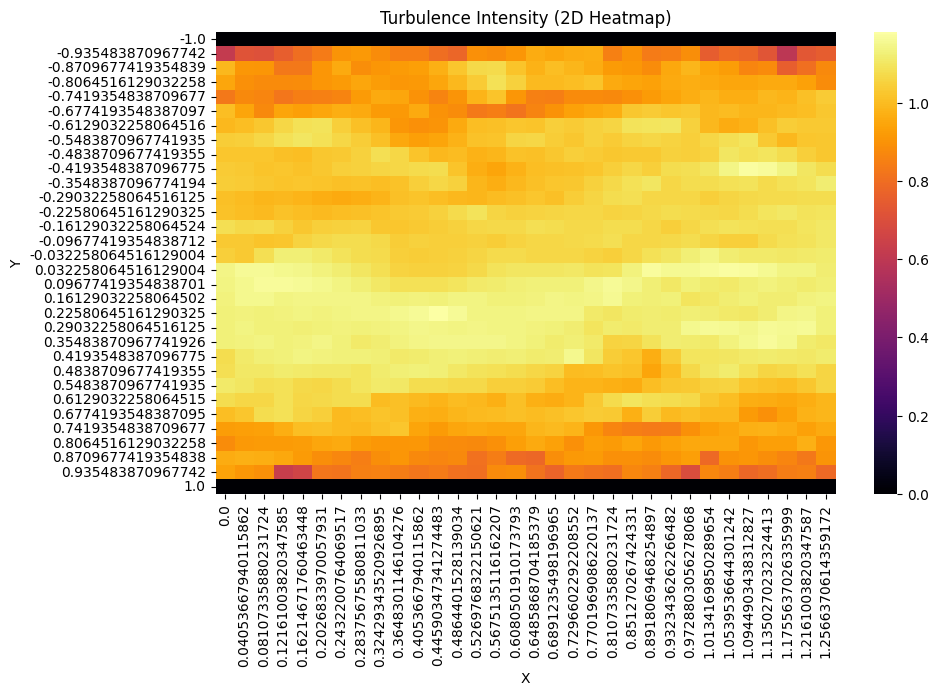

In [ ]:
# Load Data
%store -r df
# 2D Heatmap
if dimension == 2:
    plt.figure(figsize=(10, 6))
    intensity_grid = df.pivot(index="y", columns="x", values="turb_intensity")
    sns.heatmap(intensity_grid, cmap="inferno", cbar=True)
    plt.title("Turbulence Intensity (2D Heatmap)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
# 3D Scatter Plot
else:
    fig = go.Figure(data=go.Scatter3d(
        x=df["x"], y=df["y"], z=df["z"],
        mode="markers", marker=dict(
            size=3, color=df["turb_intensity"], colorscale="inferno", opacity=0.7
        )
    ))
    fig.update_layout(title="Turbulence Intensity (3D Scatter Plot)", scene=dict(
        xaxis_title="X", yaxis_title="Y", zaxis_title="Z"))
    fig.show()



Why Visualize Turbulence?

 Helps in understanding turbulence effects in real-world applications.

 Allows us to identify flow separation, vortex regions, and turbulence hotspots.